In [1]:
from qdrant_client import QdrantClient
from qdrant_client.http import models
from PIL import Image
import os

import qdrant.utils as qd
import models.models as mdl

/home/oliveira/miniforge3/envs/test_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-16 14:54:07.793780: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:

# Using containers
# client = QdrantClient(host="qdrant", port=6333)

# Local dev
client = QdrantClient(host="localhost", port=6333)

collection = "image_collection"

# facebook/dino-vits16 size: 384
# Vit Base Patch16 224 In21k size: 768
qd.create_collection(client, collection, 768, models.Distance.COSINE)


In [4]:
image_names = []
image_files = []

current_directory = os.getcwd()
extensions = (".jpg", ".jpeg")

# Save name and img obj from every image in {path}
def get_images_info(path):
    img_names = []
    img_files = []

    for file in os.listdir(f"{path}"):
        if file.endswith(extensions):
            img_names.append(file.split(".")[0])
            img_files.append(Image.open(os.path.join(f"{path}",file)))   
    
    return img_names, img_files

image_names, image_files = get_images_info(f"{current_directory}/assets")


In [5]:
image_files

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x576>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=980x549>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2636x1590>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x270>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=792x475>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=855x534>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1080x912>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1068x1335>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1860x1060>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x1080>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1264x843>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=709x70

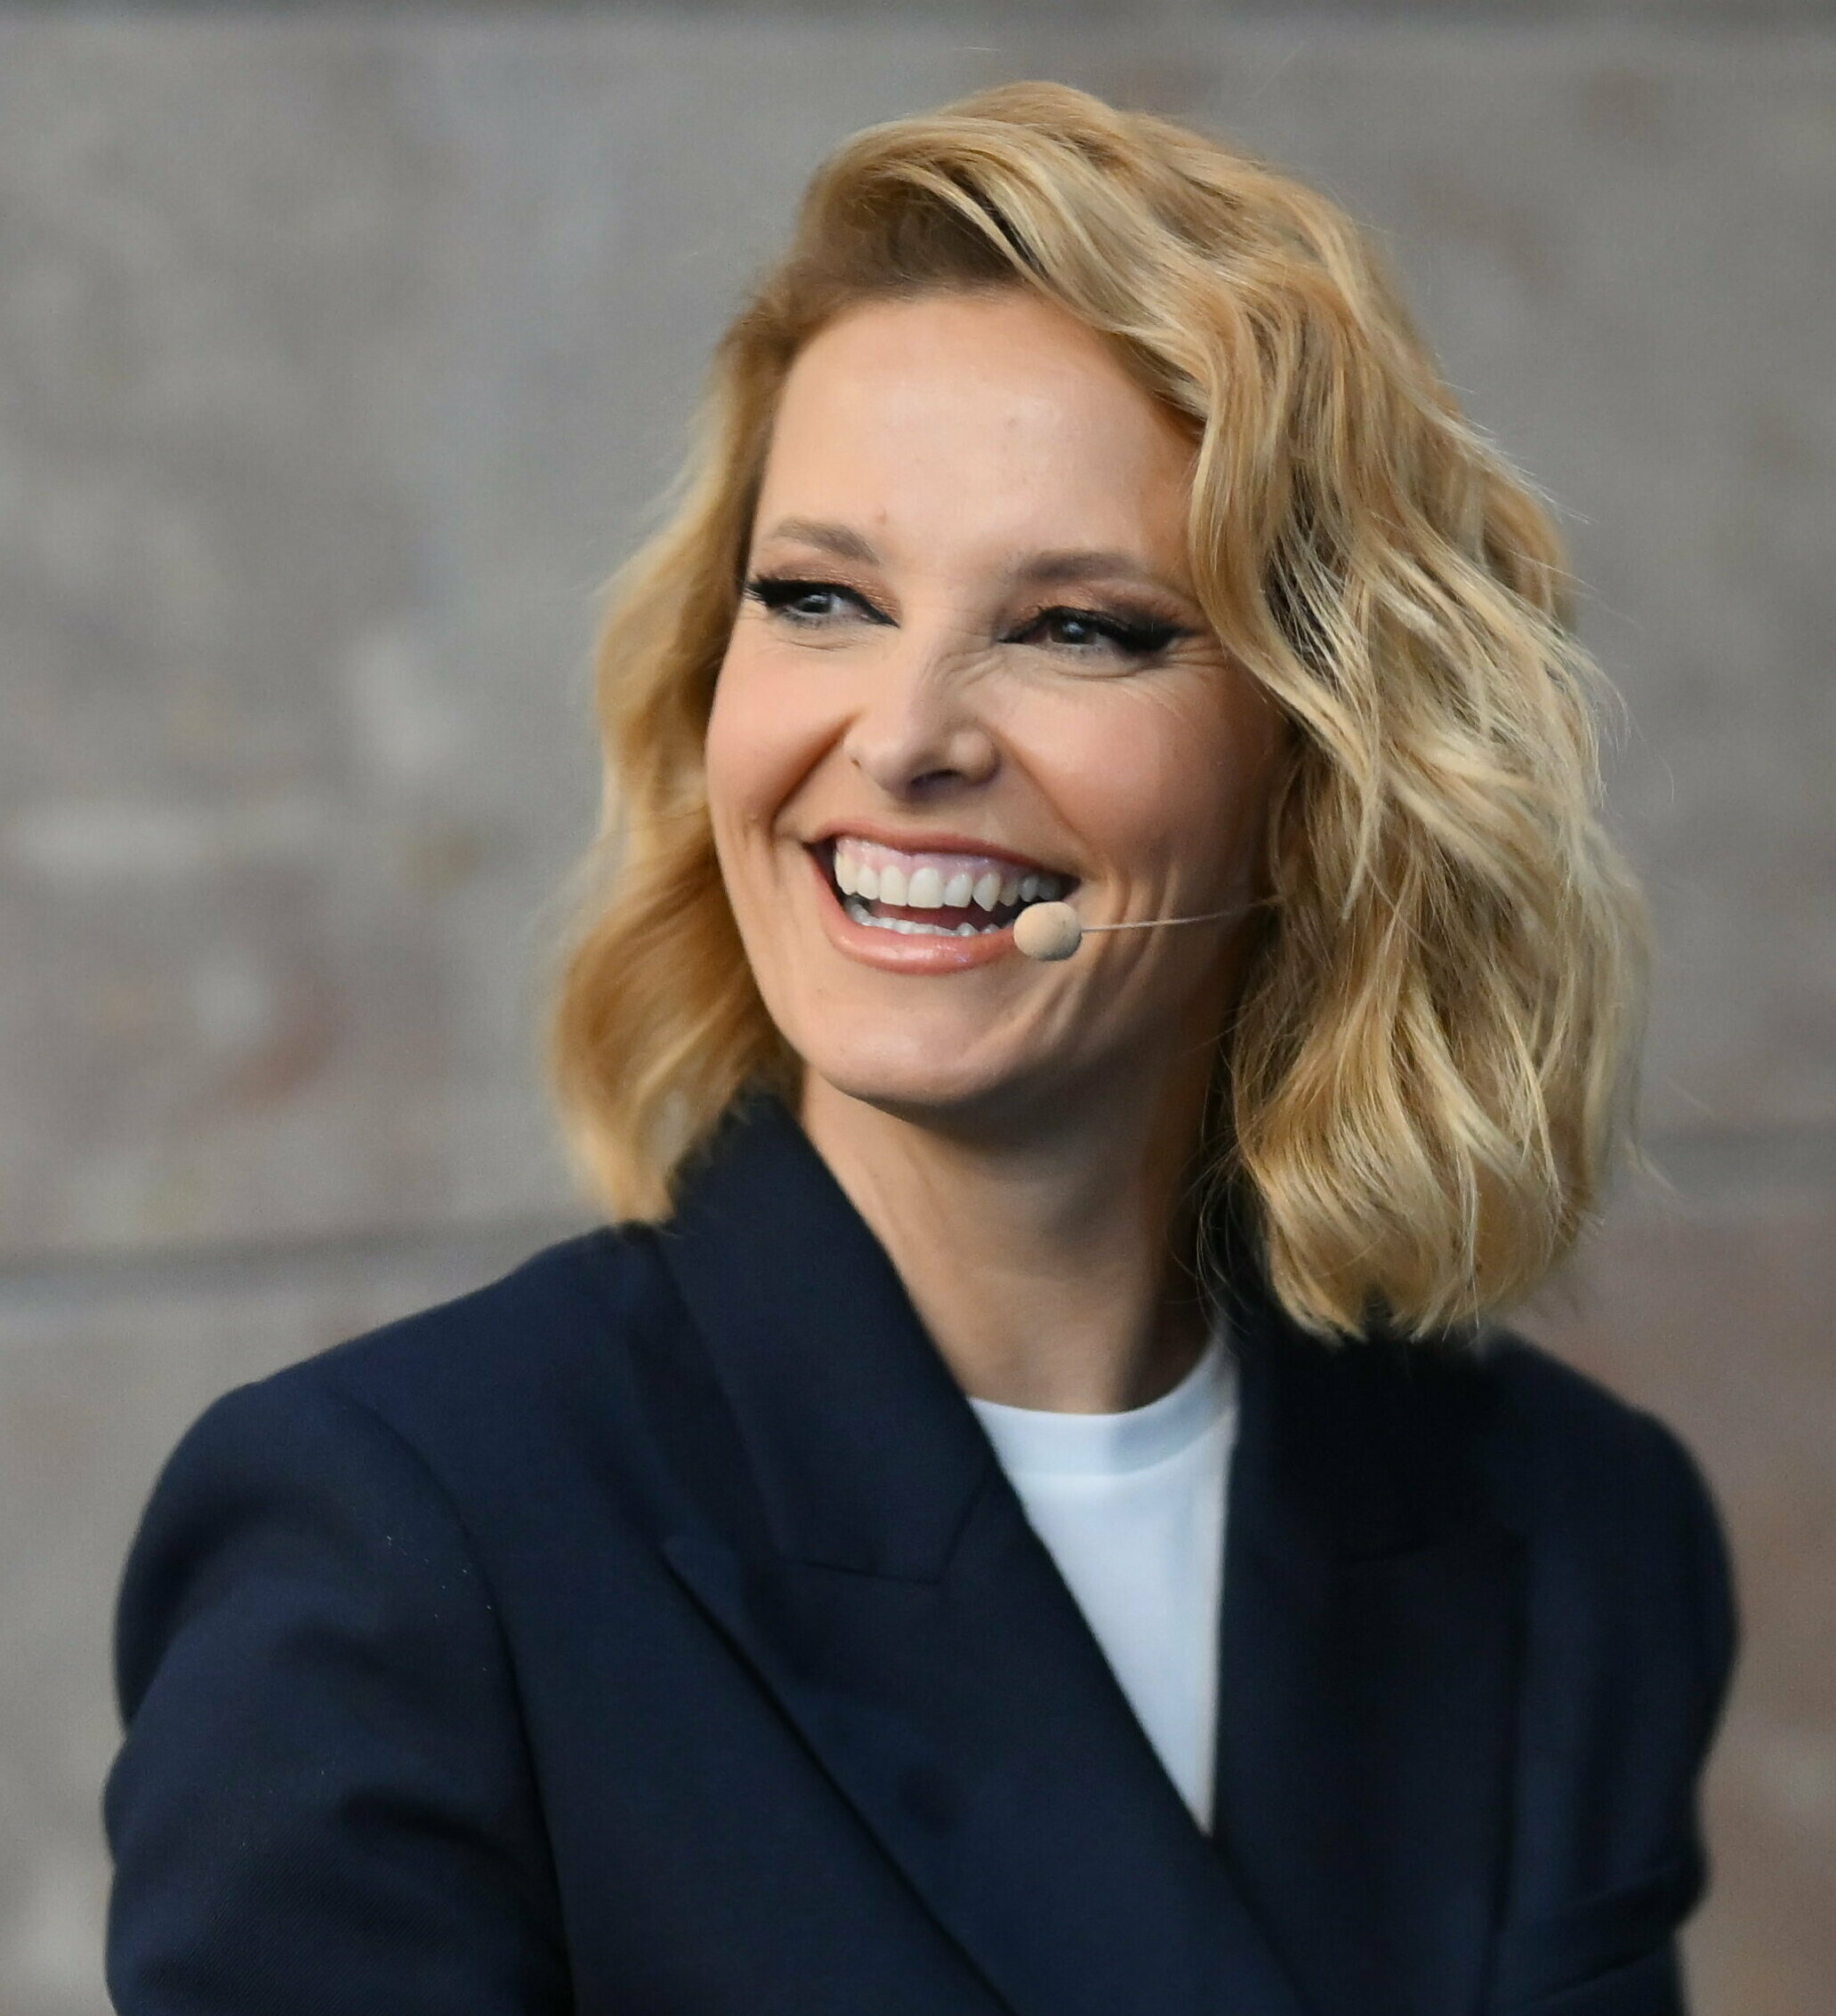

In [15]:
image = image_files[20]
image

In [ ]:
# Initialize models 
dino = "dino_vits16"
device, processor, model, detector = mdl.init_models()


In [7]:
# Create directory if needed
faces_path = "faces"
if not os.path.exists(faces_path):
    os.makedirs(faces_path)

# Save faces as images in faces folder
for i, image in enumerate(image_files):
    destiny_path = f"{current_directory}/{faces_path}/"
    mdl.process_image(image,
                      detector,
                      destiny_path,
                      image_names[i])

# Get faces information
faces_names, faces_files = get_images_info(f"{current_directory}/{faces_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━

In [8]:
# Generate embeddings
embeddings = mdl.gen_embeddings(faces_files, processor, device, model)
embeddings

array([[[ 0.12646781,  0.08646891, -0.49874464, ..., -0.09202035,
          0.09870946, -0.13591665]],

       [[ 0.16752772,  0.08437212, -0.04699159, ...,  0.01939279,
          0.16619271,  0.06723775]],

       [[ 0.09700899,  0.09796381, -0.26358026, ...,  0.08811001,
          0.24270402, -0.34235966]],

       ...,

       [[ 0.11307547,  0.11010607, -0.12301363, ..., -0.20303285,
          0.22357897, -0.13023567]],

       [[ 0.24344249,  0.33709785, -0.3067249 , ..., -0.24702564,
          0.09770999, -0.17942506]],

       [[ 0.07816999,  0.17040658, -0.3505847 , ..., -0.13447541,
          0.16729593, -0.13876092]]], shape=(41, 1, 768), dtype=float32)

In [9]:

# Save embeddings to DB
for i in range(0, len(faces_files)):
    qd.insert_image_embedding(client, collection, i, faces_names, embeddings)

In [14]:
img_to_search = mdl.gen_embedding_img_to_search(f"{current_directory}/Cândido_Costa_1.jpg", processor, device, model, detector)
img_to_search

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


[[-0.01236069854348898,
  0.17105282843112946,
  -0.23372048139572144,
  -0.17054052650928497,
  -0.07819215953350067,
  -0.05433959141373634,
  0.043576255440711975,
  -0.11810556054115295,
  -0.03774918243288994,
  0.0009330033208243549,
  -0.09325633198022842,
  0.10930479317903519,
  0.041137244552373886,
  -0.12446199357509613,
  0.03478941321372986,
  0.19990764558315277,
  0.08684652298688889,
  0.291759729385376,
  -0.11820457130670547,
  0.0919024869799614,
  -0.14179487526416779,
  -0.12307796627283096,
  0.05738053098320961,
  0.18028664588928223,
  -0.2317156195640564,
  -0.2918536365032196,
  -0.012587265111505985,
  -0.16944348812103271,
  -0.28984692692756653,
  -0.2424488514661789,
  -0.05816483870148659,
  -0.03149755671620369,
  0.1432209461927414,
  0.03501298651099205,
  0.13056080043315887,
  0.27382951974868774,
  -0.2589820921421051,
  0.268703430891037,
  0.03057064674794674,
  -0.2824358344078064,
  -0.10092292726039886,
  0.042899224907159805,
  -0.08768683671

In [15]:
len(img_to_search), len(img_to_search[0])

(1, 768)

In [17]:
# Search top X similar results
top = 3
nearest_results = []
for img in img_to_search:
    nearest = qd.get_top_x_similar_images(client, collection, top, img)
    nearest_results.append(nearest)

nearest_results

[QueryResponse(points=[ScoredPoint(id=10, version=51, score=0.9984642, payload={'name': 'cândido costa ', 'image_url': 'Cândido_Costa_1.jpg'}, vector=None, shard_key=None, order_value=None), ScoredPoint(id=33, version=74, score=0.72255933, payload={'name': 'cândido costa ', 'image_url': 'Cândido_Costa_2.jpg'}, vector=None, shard_key=None, order_value=None), ScoredPoint(id=35, version=76, score=0.6878725, payload={'name': 'cândido costa ', 'image_url': 'Cândido_Costa_3.jpg'}, vector=None, shard_key=None, order_value=None)])]

1 face was found in the provided image
Face 1:
Result #1: cândido costa  was diagnosed with 99.84642000000001 confidence
This image score was 0.9984642


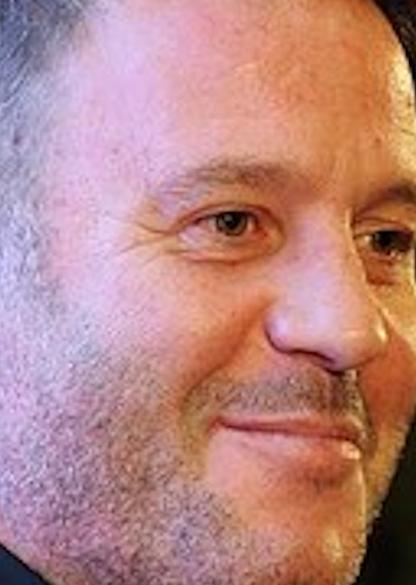

--------------------------------------------------

Result #2: cândido costa  was diagnosed with 72.255933 confidence
This image score was 0.72255933


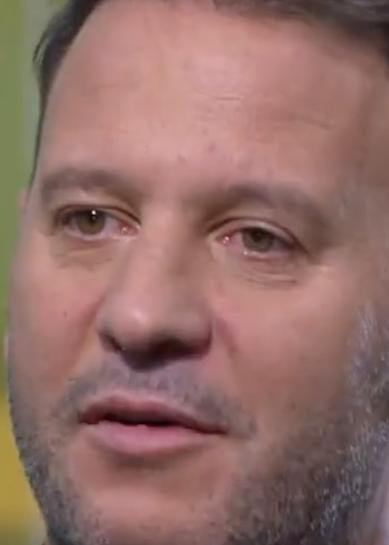

--------------------------------------------------

Result #3: cândido costa  was diagnosed with 68.78725 confidence
This image score was 0.6878725


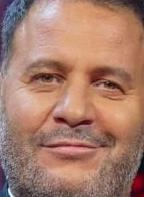

--------------------------------------------------



In [ ]:
def print_results(results):
    msg = f"{len(results)} faces were found in the provided image" if len(results) > 1 else print(f"{len(results)} face was found in the provided image")
    print(msg)
    for j, result in enumerate(results):
        # print(f"{j}: {result.points}")
        points = result.points
        print(f"Face {j+1}:")
        for i in range(len(points)):
            name = points[i].payload['name']
            score = points[i].score
            print(f"Result #{i+1}: {name} was diagnosed with {score * 100} confidence")
            print(f"This image score was {score}")
            Image.open(f"faces/{points[i].payload['image_url']}").show()
            print("-" * 50)
            print()

print_results(nearest_results)